# Lecture worksheet 21

### Reminder: Only question 1 is graded for credit. All other questions are optional (but still recommended).

The next two cells are duplicated from the notes for your convenience.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

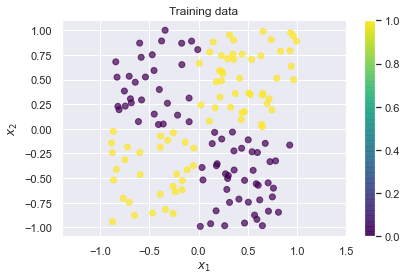

In [2]:
### This cell is exactly the same as the version from the notes
N_test = 500
N_train = 150

np.random.seed(2021)

# Create a training dataset
x1_train = np.random.uniform(-1, 1, N_train)
x2_train = np.random.uniform(-1, 1, N_train)

y_train = (x1_train * x2_train > 0).astype(np.int64)


# Create a feature matrix that we can use for classification
X_train = np.vstack([x1_train, x2_train]).transpose()


# Create a test dataset
x1_test = np.random.uniform(-3, 3, N_test)
x2_test = np.random.uniform(-3, 3, N_test)

y_test = (x1_test * x2_test > 0).astype(np.int64)


# Create a feature matrix that we can use to evaluate
X_test = np.vstack([x1_test, x2_test]).transpose()

def draw_results(x1, x2, color, plot_title=''):
    plt.figure()
    plt.scatter(x1, x2, c=color, cmap='viridis', alpha=0.7);
    plt.colorbar()
    plt.title(plot_title)
    plt.axis('equal')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.tight_layout()
    
draw_results(
    x1_train, x2_train, color=y_train,
    plot_title="Training data"
)

## Question 1

### Q1.1 Fill-in-the-blank

For each of the following, fill in the blank. Try to keep your answers as specific as possible.

(a) Backpropagation is an efficient way of computing ______.

(b) At each layer of a neural network (except the last), we apply a ______ function.

(c) Interpretability (and/or explainability) is especially important in cases where ______.

## Question 2: Backpropagation and Neural Nets

### Q2.1 Backpropagation and sigmoids

Most modern-day implementations of neural networks avoid using sigmoid functions for the nonlinearity, and instead favor functions like the **RE**stricted **L**inear **U**nit, aka ReLU (both functions are shown below). One of the main reasons is that when using the sigmoid, the gradient entries often end up being 0: this is called the **vanishing gradient problem**.

(a) Why would the sigmoid often lead to gradient values of 0 when using backpropagation? *Hint: what happens to the derivative for each of these two functions as the input gets large?*

(b) When optimizing, why is it bad for the gradient values to be 0?

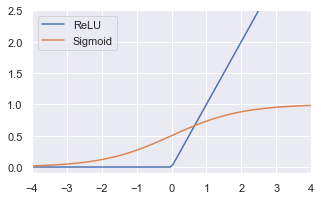

In [3]:
# This cell plots two different nonlinearities used in neural networks:
# The restricted linear unit (ReLU) and the sigmoid
f, ax = plt.subplots(1, 1, figsize=(5, 3))

x = np.linspace(-4, 4, 100)
relu = np.fmax(x, 0)
sigmoid = 1/(1 + np.exp(-x))
ax.plot(x, relu, label='ReLU')
ax.plot(x, sigmoid, label='Sigmoid')
ax.axis([-4, 4, -0.1, 2.5])

ax.legend()

### Q2.2 Implementing a neural network

The following code implements a two-layer neural network. Read over it and try to understand as much of it as you can, then answer the questions below.

In [ ]:
## First cell: set up the data and define the model

import torch
from torch.nn import Sequential, Linear, ReLU
from torch import sigmoid

# The .float() at the end converts to an internal representation
# that pytorch can work with (32-bit floating point number)
X_pt = torch.from_numpy(X_train).float()
y_pt = torch.from_numpy(y_train[:, np.newaxis]).float()

# Remember that the first layer of the neural network generates features.
# This parameter controls how many features get generated.
nn_layer_size = 5

# Sequential models apply component to the input, one after the other
two_layer_classification_nn = Sequential(
    Linear(2, nn_layer_size),
    ReLU(),
    Linear(nn_layer_size, 1),
)
two_layer_classification_nn

In [ ]:
## Second cell: run gradient descent

from torch.optim import SGD
from torch.nn import BCEWithLogitsLoss  # BCE stands for "Binary Cross Entropy"

# The optimizer takes care of taking steps in the direction of the gradient
# for all the parameters in the model. So, we need to tell it what the parameters
# are:
optimizer = SGD(two_layer_classification_nn.parameters(), lr=0.1)
loss_function = BCEWithLogitsLoss()

# One round of training on the entire dataset is called an "epoch".
previous_loss = np.inf
for epoch in range(5000):
    # First, zero out the gradients:
    optimizer.zero_grad()

    # Next, we run the model 'forward' to compute the predictions
    # and then the loss.

    # The first time this code is run (epoch=0), pytorch builds the computation
    # graph behind the scenes, and then reuses it on subsequent iterations.
    predictions = two_layer_classification_nn.forward(X_pt)
    loss = loss_function(predictions, y_pt)
    
    # Next, we compute the gradients using .backward()
    loss.backward()
    
    # Finally, we can run one step of gradient descent:
    optimizer.step()
    if epoch % 500 == 0:
        # Before we print out the loss, we use .detach().numpy(), which is how we convert
        # pytorch tensors (assuming they're part of a computation graph) to numpy arrays.
        
        # The .detach() part creates a copy that's disconnected from the computation graph.
        print("Epoch:", epoch, " | Loss:", loss.detach().numpy())

(a) Use the `predictions` variable and the `draw_results` helper function to visualize the neural net results (predicted probabilities) on the **training set** (the same way we plotted the results from the other models in the notes). 

*Hint: before the `predictions` tensor can be visualized, you'll need to do a few things to it. All the code you need is either imported or demonstrated in the two cells above.*

(b) Now visualize the results (predicted probabilities) on the test set. What do you observe?

(b) Change the learning rate to 0.001, and rerun all four cells (model/data setup, training, and train/test visualization). How do the results change? Why?

(c) Repeat part (b), but for a learning rate of 10.0.

## Question 3

### Q3.1

Suppose we use linear regression trying to predict a complex, nonlinear function of six features. Describe something you can do that will both (a) significantly increase training set accuracy, and (b) significantly decrease interpretability.

### Q3.2

(a) Use logistic regression to fit the checkerboard toy dataset, but add one additional feature: the product of $x_1$ and $x_2$. How well does this model do?

(b) How would you interpret the coefficients from the model?